# **Logistic Regression**

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
titanic_data = pd.read_csv('/content/drive/My Drive/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_data.shape

(891, 12)

In [12]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
titanic_data.drop(columns = ['Cabin', 'PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis = 1, inplace = True)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [15]:
titanic_data = pd.get_dummies(titanic_data, columns = ['Sex', 'Embarked'])
titanic_data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [16]:
import matplotlib.pyplot as plt
correl = titanic_data.corr()
correl

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
Fare,0.257307,-0.549500,0.096067,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.093254,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.093254,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.036261,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022405,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.032523,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000


In [0]:
titanic_data['Age'].fillna((titanic_data['Age'].mean()), inplace=True)

In [18]:
target = titanic_data['Survived']
titanic_data.drop(['Survived'],axis =1, inplace = True)
titanic_data.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_data, target, test_size = 0.2, random_state = 123)
print(x_train.shape)
print(x_test.shape)
titanic_data.dropna(axis = 1, inplace = True)

(712, 8)
(179, 8)


# **Linear Regression with 81% accuracy**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
lr = LogisticRegression(random_state = 1, max_iter = 10000)
lr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
pred = lr.predict(x_train)
acc = accuracy_score(y_train, pred)
print(np.round(acc*100, 2), '%')
predictions = lr.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

78.65 %
81.01 %


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, classification_report
confusion_matrix(y_test, predictions)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       435
           1       0.74      0.70      0.72       277

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [0]:
fpr, tpr, thresholds = roc_curve(y_test, predictions )
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--') 
  plt.title('Logistic Regression ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

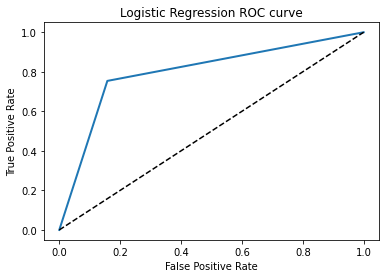

In [24]:
plot_roc_curve(fpr, tpr)

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.7979757085020243

## **Decision Tree Classifier with 86% accuracy**

The roc_auc score should be ideally close to 1. This makes up as a very poor classifier.

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 6, random_state = 1, max_features = 8)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [27]:
pred = dtc.predict(x_train)
acc = accuracy_score(y_train, pred)
print("Training acc :")
print(np.round(acc * 100, 2), '%')

prediction = dtc.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Test acc:")
print(np.round(accuracy * 100, 2), '%')
print()

print(confusion_matrix(y_test, prediction))
print('=' * 60)
print(classification_report(y_test, prediction))

Training acc :
85.67 %
Test acc:
86.03 %

[[107   7]
 [ 18  47]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       114
           1       0.87      0.72      0.79        65

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



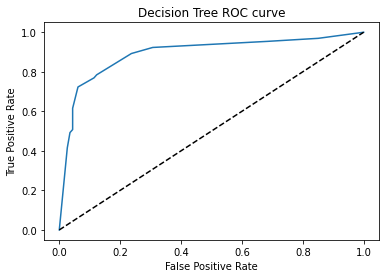

In [28]:
probs = dtc.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.show()

In [29]:
print(roc_auc_score(y_test, prediction))

0.8308367071524967


# Random Forest Classifier with 83% accuracy

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
rfc = RandomForestClassifier(n_estimators = 64, random_state = 1, max_features = 8)
rfc.fit(x_train, y_train)

print('The training error is {0:.3f}'.format(mean_squared_error(y_train, rfc.predict(x_train))))
print('The testing error is {0:.3f}'.format(mean_squared_error(y_test, rfc.predict(x_test))))

The training error is 0.022
The testing error is 0.168


In [62]:
pred = rfc.predict(x_train)
acc = accuracy_score(y_train, pred)
print("Training acc :")
print(np.round(acc * 100, 2), '%')

prediction = rfc.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Test acc:")
print(np.round(accuracy * 100, 2), '%')
print()

print(confusion_matrix(y_test, prediction))
print('=' * 60)
print(classification_report(y_test, prediction))

Training acc :
97.75 %
Test acc:
83.24 %

[[98 16]
 [14 51]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.76      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



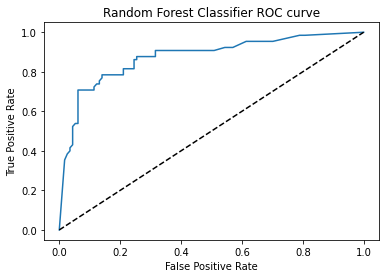

In [63]:
probs = rfc.predict_proba(x_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC curve')
plt.show()

In [64]:
print(roc_auc_score(y_test, prediction))

0.822132253711201


# **Gradient Boosting Classifier with 87% accuracy**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
pred = gbc.predict(x_train)
acc = accuracy_score(y_train, pred)
print("Training acc :")
print(np.round(acc * 100, 2), '%')

prediction = gbc.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Test acc:")
print(np.round(accuracy * 100, 2), '%')
print()

print(confusion_matrix(y_test, prediction))
print('=' * 60)
print(classification_report(y_test, prediction))

Training acc :
89.47 %
Test acc:
87.15 %

[[105   9]
 [ 14  51]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       114
           1       0.85      0.78      0.82        65

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



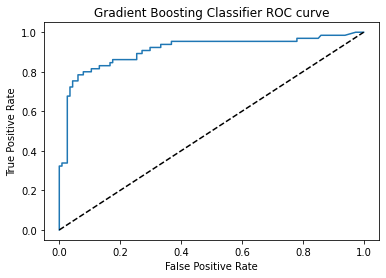

In [109]:
probs = gbc.predict_proba(x_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [110]:
print(roc_auc_score(y_test, prediction))

0.8528340080971659


## **XGB Classifier with 88% accuracy**

In [75]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate = 0.3, n_estimators = 180, max_depth = 3)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [76]:
pred = xgb_clf.predict(x_train)
acc = accuracy_score(y_train, pred)
print("Training acc :")
print(np.round(acc * 100, 2), '%')

prediction = xgb_clf.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Test acc:")
print(np.round(accuracy * 100, 2), '%')
print()

print(confusion_matrix(y_test, prediction))
print('=' * 60)
print(classification_report(y_test, prediction))

Training acc :
92.98 %
Test acc:
88.27 %

[[103  11]
 [ 10  55]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       114
           1       0.83      0.85      0.84        65

    accuracy                           0.88       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



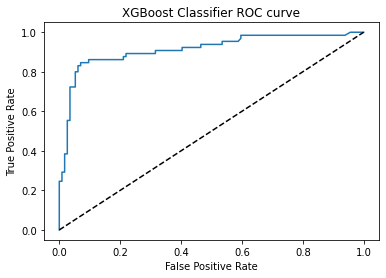

In [79]:
probs = xgb_clf.predict_proba(x_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC curve')
plt.show()

In [80]:
print(roc_auc_score(y_test, prediction))

0.8748313090418355
